# Exercises for Hughes and Hase: Chapter 4

Python activities to complement Measurements and their Uncertainties, Chapter 4, "Error propagation." Section numbers in the book correspond to those listed below.

<-- General comments on how to use Jupyter Notebook -->

## 4.1 Propagating the error in a single-variable function

Reproduce Fig. 4.1(a). The caption says that this shows Bragg's law for a silicon single crystal. This is incorrect: silicon has a room temperature lattice constant of $a = 0.5431$ nm, which gives $\lambda = 2 a = 1.1$ nm for $\theta = \frac{\pi}{2}$, as shown in the plot. But silicon's diamond structure suppresses Bragg scattering from planes with this spacing; Bragg scattering is allowed, however, for lattice planes $d=a/\sqrt{3} = 0.3$ nm, which would give $\lambda = 2 a/\sqrt{2} = 0.63$  nm for $\theta = \frac{\pi}{2}$ . We'll ignore this oversight so that we can compare results with the book.

Text(80, 0.8, '(a)')

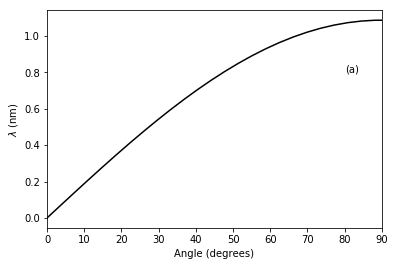

In [223]:
# import numpy library and name it "np".
import numpy as np
# import matplotlib.pyplot and name it "plt"
import matplotlib.pyplot as plt

d = 0.5431 # (nm)
theta_rad = np.linspace(0, np.pi) # Python uses radians for angles
theta_deg = np.degrees(theta_rad)

plt.plot(theta_deg, 2*d*np.sin(theta_rad), 'k-')
plt.xlabel('Angle (degrees)')
plt.xlim(0, 90)
plt.ylabel('$\lambda$ (nm)')
plt.text(80, 0.8, '(a)')

## 4.1.1 The functional approach for single-variable functions
Consider a fixed angular uncertainty of $\alpha_{\theta}=0.05^\circ$.

In [224]:
alpha_theta_deg = 0.05
alpha_theta_rad = np.deg2rad(alpha_theta_deg)

Confirm the wavelength uncertainties given in the text.

In [225]:
theta_eval_deg = np.array([15, 75])
theta_eval_rad = np.deg2rad(theta_eval_deg)

alpha_lambda = 2*d*(np.sin(theta_eval_rad + alpha_theta_rad) - np.sin(theta_eval_rad))


print(np.around(1e3 * alpha_lambda, decimals=4)) # Display in units of pm

[0.9155 0.2449]


Reproduce Fig. 4.1(b) for $\bar{\theta} = 75^{\circ}$, where the $\sin$ function is more nonlinear. 
<-- comments on how to plot in Python --> 

[75.   74.95 75.05] [1.04918863 1.0489429  1.04943356]
(1.0485114744077384, 1.0498607968568938)


[Text(0, 0, '$\\bar{\\theta}$'),
 Text(0, 0, '$\\bar{\\theta} -\\alpha_\\theta $'),
 Text(0, 0, '$\\bar{\\theta} + \\alpha_\\theta $')]

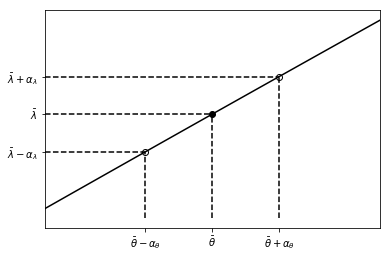

In [226]:
theta_bar_deg = theta_eval_deg[1]
theta_bar_rad = np.deg2rad(theta_bar_deg)
theta_interval_deg = theta_bar_deg+alpha_theta_deg*np.array([-1,1])
theta_interval_rad = np.deg2rad(theta_interval_deg)
theta_lim = theta_bar_deg + 2.5*alpha_theta_deg*np.array([-1,1])
theta_deg = np.linspace(theta_lim[0],theta_lim[1])
theta_rad = np.deg2rad(theta_deg)

# Plot theory curve

plt.plot(theta_deg, 2*d*np.sin(theta_rad), 'k-')
plt.xlim(theta_lim)

# Place closed marker at measurement point
plt.plot(theta_bar_deg, 2*d*np.sin(theta_bar_rad), 'ko')
# Place open markers at uncertainty limits
plt.plot(theta_interval_deg, 2*d*np.sin(theta_interval_rad), 'ko', mfc='none')

# Connect markers with axes with dashed lines
marker_position_x = np.insert(theta_interval_deg, 0, theta_bar_deg)

marker_position_y = 2*d*np.sin(np.insert(theta_interval_rad, 0, theta_bar_rad))
lambda_lim = plt.gca().get_ylim()
print(marker_position_x, marker_position_y)
print(plt.gca().get_ylim())


for i_marker in range(3):
    v_line_x = marker_position_x[i_marker]*np.array([1, 1])

    v_line_y = np.array([lambda_lim[0], marker_position_y[i_marker]])
    h_line_x = np.array([theta_lim[0], marker_position_x[i_marker]])
    h_line_y = marker_position_y[i_marker]*np.array([1, 1])

    plt.plot(h_line_x, h_line_y, 'k--', v_line_x, v_line_y, 'k--')
    
plt.gca().set_yticks(marker_position_y)
plt.gca().set_yticklabels(['$\\bar{\lambda}$', '$\\bar{\lambda} -\\alpha_\lambda $', '$\\bar{\lambda} + \\alpha_\lambda $'])

plt.gca().set_xticks(marker_position_x)
plt.gca().set_xticklabels(['$\\bar{\\theta}$', '$\\bar{\\theta} -\\alpha_\\theta $', '$\\bar{\\theta} + \\alpha_\\theta $'])



## 4.1.2 A calculus-based approximation for single-variable functions
Compare the calculus-based method with the functional approach for the Bragg's law example.

In [227]:
alpha_lambda_calc = np.abs(2*d*np.cos(theta_eval_rad)) * alpha_theta_rad

In [228]:
print('Uncertainty, functional approach (pm):')
print(np.around(1e3 * alpha_lambda, decimals=4))

Uncertainty, functional approach (pm):
[0.9155 0.2449]


In [229]:
print('Uncertainty, calculus-based approximation (pm):')
print(np.around(1e3 * alpha_lambda_calc, decimals=4))

Uncertainty, calculus-based approximation (pm):
[0.9156 0.2453]


Increase angular uncertainty by a factor of 100, from 0.05 degrees to 5 degrees, and compare again. Note that the calculus-based estimate overestimates the uncertainty because the sin function is sub-linear---that is, as the argument increases, the slope decreases.

In [230]:
alpha_theta_deg = 100 * 0.05
alpha_theta_rad = np.deg2rad(alpha_theta_deg)

alpha_lambda = 2*d*(np.sin(theta_eval_rad + alpha_theta_rad) - np.sin(theta_eval_rad))
alpha_lambda_calc = np.abs(2*d*np.cos(theta_eval_rad)) * alpha_theta_rad

In [231]:
print('Uncertainty, functional approach (pm):')
print(np.around(1e3 * alpha_lambda, decimals=4))

Uncertainty, functional approach (pm):
[90.373  20.5095]


In [232]:
print('Uncertainty, calculus-based approximation (pm):')
print(np.around(1e3 * alpha_lambda_calc, decimals=4))

Uncertainty, calculus-based approximation (pm):
[91.559  24.5332]


## 4.1.3 Look-up table for common single-variable functions
Let's continue this comparison for the functions shown in Table 4.1. Set $A = 1$ and $\alpha_A = 0.01$ , and calculate $\alpha_Z$ using both the functional approach and the calculus-based approach. It's convenient to put this in a loop, where the function changes in each iteration but otherwise the calculation is the same. 

<--- need to be modified |
We can do this using two new MATLAB programming concepts: structures and anonymous functions.

Let's start with structures , which are a way to store data of different types in a single array. We'll begin by making a structure array S that contains the function names in the field name. | --->

In [233]:
s = {'name': ['1/x', 'exp(x)', 'ln x', 'log x', 'x**n', '10**x', 'sin x', 'cos x', 'tan x']}
print(s)
print(s['name'][0])

{'name': ['1/x', 'exp(x)', 'ln x', 'log x', 'x**n', '10**x', 'sin x', 'cos x', 'tan x']}
1/x


<--- comments on Python Dictionary and lambda function ---> 

In [234]:
zFun = lambda x: 1./x
for i in range(1, 4):
    print(i, zFun(i))

1 1.0
2 0.5
3 0.3333333333333333


Now we can define new fields in s, function and derivative, that contain anonymous functions for the function and its derivative. We choose $n = 3$ for the function $Z(A) = A^n$.

In [235]:
import inspect
s['Function'] = [lambda x: 1./x, 
                 lambda x: np.exp(x), 
                 lambda x: np.log(x),
                 lambda x: np.log10(x),
                 lambda x: x**3,
                 lambda x: 10**x, 
                 lambda x: np.sin(x),
                 lambda x: np.cos(x), 
                 lambda x: np.tan(x)]

print(inspect.getsource(s['Function'][0]))

s['derivative'] = [lambda x: - 1./x**2, 
                   lambda x: np.exp(x), 
                   lambda x: 1./x,
                   lambda x: 1./(np.log(10)*x),
                   lambda x: 3*x**2,
                   lambda x: 10**x*np.log(10), 
                   lambda x: np.cos(x),
                   lambda x: - np.sin(x), 
                   lambda x: 1 + np.tan(x)**2]

print(s['Function'][0](2))

s['Function'] = [lambda x: 1./x, 
                 lambda x: np.exp(x), 
                 lambda x: np.log(x),
                 lambda x: np.log10(x),
                 lambda x: x**3,
                 lambda x: 10**x, 
                 lambda x: np.sin(x),
                 lambda x: np.cos(x), 
                 lambda x: np.tan(x)]

0.5


The dictionary now has three fields, and two of the fields contain anonymous functions. Each field conatians a list of nine elements. 

In [236]:
print(s.keys())

dict_keys(['name', 'Function', 'derivative'])


In [237]:
import inspect
print(inspect.getsource(s['Function'][0]))
print(inspect.getsource(s['derivative'][0]))

s['Function'] = [lambda x: 1./x, 
                 lambda x: np.exp(x), 
                 lambda x: np.log(x),
                 lambda x: np.log10(x),
                 lambda x: x**3,
                 lambda x: 10**x, 
                 lambda x: np.sin(x),
                 lambda x: np.cos(x), 
                 lambda x: np.tan(x)]

s['derivative'] = [lambda x: - 1./x**2, 
                   lambda x: np.exp(x), 
                   lambda x: 1./x,
                   lambda x: 1./(np.log(10)*x),
                   lambda x: 3*x**2,
                   lambda x: 10**x*np.log(10), 
                   lambda x: np.cos(x),
                   lambda x: - np.sin(x), 
                   lambda x: 1 + np.tan(x)**2]



Now we can loop over the elements of the dictionary s to compare the functional and calculus-based approaches to error propagation methods. 
<--- comments on how to fomat print function --->

In [238]:
a = 1
alpha_a = 0.01
print('a = {0:.4f}, da = {1:.4f} \n'.format(a, alpha_a))
print('Z(A) \t Z(A+dA)-Z(A) \t |dZ/dA|alphaA\n')

for i_z in range(len(s['name'])):

    alpha_z_fun = np.abs(s['Function'][i_z](a + alpha_a) - s['Function'][i_z](a))
    alpha_z_cal = abs(s['derivative'][i_z](a) * alpha_a)
    print('{0:s} \t {1:9.6f} \t {2:9.6f} \t'.format(s['name'][i_z], alpha_z_fun, alpha_z_cal))

a = 1.0000, da = 0.0100 

Z(A) 	 Z(A+dA)-Z(A) 	 |dZ/dA|alphaA

1/x 	  0.009901 	  0.010000 	
exp(x) 	  0.027319 	  0.027183 	
ln x 	  0.009950 	  0.010000 	
log x 	  0.004321 	  0.004343 	
x**n 	  0.030301 	  0.030000 	
10**x 	  0.232930 	  0.230259 	
sin x 	  0.005361 	  0.005403 	
cos x 	  0.008442 	  0.008415 	
tan x 	  0.034798 	  0.034255 	


<--- comments on how the data was generated ---> 

The lines below increase alphaA by a factor of ten, to alphaA = 0.1, and write the resulting error propagation values to TestTable.txt. Once you run these commands, you can view the results in a text editor; alternatively, you can view the file in the command window using the type statement.

In [239]:

# open a file and name it TestTable.text and give an aliase name f
# TestTable.text will be open according to the indentation for 'with open(....) as f:'

with open('TestTable.txt', 'w') as f:
    a = 1
    alpha_a = 0.1
    
    f.write('a = {0:.4f}, da = {1:.4f} \n'.format(a, alpha_a))
    f.write('Z(A) \t Z(A+dA)-Z(A) \t |dZ/dA|alphaA\n')
    
    for i_z in range(len(s['name'])):

        alpha_z_fun = np.abs(s['Function'][i_z](a + alpha_a) - s['Function'][i_z](a))
        alpha_z_cal = abs(s['derivative'][i_z](a) * alpha_a)
        f.write('{0:s} \t {1:9.6f} \t {2:9.6f} \n'.format(s['name'][i_z], alpha_z_fun, alpha_z_cal))




## 4.1.4 Worked example---single variable function
Check the worked examples using s[:][6], defined above. The book discusses the functional and calculus-based approach for alpha_a = 0.1 and alpha_a = 0.4. The %5.1g format operator displays the input in floating-point format to one ''significant figure'', as appropriate for uncertainties (%5.1f will produce one digit after the decimal place, regardless of its significance).

In [240]:
a = 2.3
z_bar = s['Function'][5](a)
print('z_bar = {0:.1f}'.format(z_bar))

z_bar = 199.5


In [241]:
alpha_a = [0.1, 0.4]
for ind in range(len(alpha_a)):
    print('='*20, 'alpha_a = {}'.format(alpha_a[ind]), '='*20)
    alpha_z_fun_p = np.abs(s['Function'][5](a + alpha_a[ind]) - s['Function'][5](a))
    alpha_z_fun_m = np.abs(s['Function'][5](a) - s['Function'][5](a - alpha_a[ind]))
    alpha_z_cal = np.abs(s['derivative'][5](a) * alpha_a[ind])

    print('Error, functional approach (alpha_a = {0:.1f})'.format(alpha_a[ind]))
    print('alpha_z = ({0:5.1g}, {1:5.1g})'.format(-alpha_z_fun_m, alpha_z_fun_p))
    print('Error, calculus-based approach (alpha = {0:.1f})'.format(alpha_a[ind]))

    print('alpha_z = ({0:5.1g}, {1:5.1g})'.format(-alpha_z_cal, alpha_z_cal))


==================== alpha_a = 0.1 ====================
Error, functional approach (alpha_a = 0.1)
alpha_z = (-4e+01, 5e+01)
Error, calculus-based approach (alpha = 0.1)
alpha_z = (-5e+01, 5e+01)
==================== alpha_a = 0.4 ====================
Error, functional approach (alpha_a = 0.4)
alpha_z = (-1e+02, 3e+02)
Error, calculus-based approach (alpha = 0.4)
alpha_z = (-2e+02, 2e+02)


## 4.2 Propagating the error through a multi-variable function
## 4.2.1 The functional approach for multi-variable functions
## 4.2.2 Worked example---functional approach for multi-variable functions
Confirm the results from this section, using an anonymous function of ''two'' variables. In this example, note the scope of the variables: a, b, and R are not defined as function variables, so the function inherits the values assigned to them in the base workspace. Note also that the function is vectorized using element-wise multiplication and  division; these are both examples of a larger class of array operators. Finally, note the unit definitions included beside all of the constants, and that the anonymous function includes multiplication by $10^{-6}$ to convert the units from Pa to MPa.

<-- describe Base workspace and vectorized ... -->

In [242]:
vm_bar = 2.000e-4        # m^3/mol
alpha_v = 0.003e-4

t_bar = 298.0                  # K
alpha_t = 0.2

a = 1.408e-1             # (m^6 Pa)/mol^2
b = 3.913e-5              # m^3/mol
R = 8.3145                     # J/K = (m^3 Pa)/K

p_fun = lambda vm, t: 1e-6 * (R*t/(vm - b) - a / vm**2)


print('P(vm_bar, t_bar) = {0:.3f} MPa'.format(p_fun(vm_bar, t_bar)))



P(vm_bar, t_bar) = 11.882 MPa


Vectorizing the function can simplify the code. Here, we form the vectors $[\bar{V}_m, \bar{V}_m + \alpha_V]$  and $[\bar{T}_m, \bar{T}_m + \alpha_T]$ and use the diff function to find differences in the function evaluations.

In [243]:
vm_range = vm_bar + np.array([0, 1]) * alpha_v
t_range = t_bar + np.array([0, 1]) * alpha_t

alpha_pt = np.abs(np.diff(p_fun(vm_bar, t_range)))
alpha_pv = np.abs(np.diff(p_fun(vm_range, t_bar)))
alpha_p = np.sqrt(alpha_pt**2 + alpha_pv**2)

print('alphaPT = {0:.3f} MPa, \t alphaPV = {1:.3f} MPa, \t alphaP = {2:.3f} MPa\n'.format(alpha_pt[0], alpha_pv[0], alpha_p[0]))




alphaPT = 0.010 MPa, 	 alphaPV = 0.018 MPa, 	 alphaP = 0.021 MPa



## 4.2.3 A calculus approximation for multi-variable functions
## 4.2.4 A look-up table for multi-variable functions
Practice your multivariable error propagation skills by using Eq. 4.16 to reproduce each line in Table 4.2 by direct calculation.
4.2.5 Comparison of methods
Confirm the results of this section. Note that the error is given as a percentage of the measured value.

## 4.2.5 Comparison of methods
Confirm the results of this section. Note that the error is given as a percentage of the measured value.

In [244]:
z_fun = lambda A, B: (A - B) / (A + B)
a_bar = 1000          # Dimensionless
b_bar = 80

alpha_a = 0.01 * a_bar
alpha_b = 0.01 * b_bar

a_range = a_bar + np.array([0, 1]) * alpha_a
b_range = b_bar + np.array([0, 1]) * alpha_b

z_bar = z_fun(a_bar, b_bar)

print('z_bar = {:.3f}'.format(z_bar))

z_bar = 0.852


In [245]:
dz_da = lambda A, B: 2 * B / (A + B)**2
dz_db = lambda A, B: - 2 * A / (A + B)**2

alpha_z_calc = np.sqrt((dz_da(a_bar, b_bar) * alpha_a)**2 + (dz_db(a_bar, b_bar)*alpha_b)**2)
alpha_z_fun = np.sqrt((np.diff(z_fun(a_range, b_bar)))**2 + (np.diff(z_fun(a_bar, b_range)))**2)

print('alpha_z_calc = {:.5f}, \t alpha_z_func = {:.5f} \n'.format(alpha_z_calc, alpha_z_fun[0]))

alpha_z_calc = 0.00194, 	 alpha_z_func = 0.00193 



## 4.2.6 Percentage errors---dominant error
This is an important idea for any experimentalist: find the ''dominant'' error and focus on it. Uncertainties add in quadrature: $\alpha _Z = \sqrt{\alpha_A^2 + \alpha_B^2}$ for $Z=A\pm B$, so if $\alpha_A = 2\alpha_B$ the square operation makes it ''four times'' more important to $\alpha_Z$. Confirm this using the example in this section. Let *alpha_rel* be a vector of the relative uncertainties for four quantities, and compute the uncertainty in their product by taking the square root of the sum of their squares. Confirm that reducing the first source of uncertainty is more important than reducing the second.

In [246]:
alpha_rel = np.array([5, 1, 1, 1]) * 0.01
alpha_tot = np.sqrt(np.sum(alpha_rel**2))
print('Initial: {:.5f} \n'.format(alpha_tot))

Initial: 0.05292 



In [247]:
alpha_rel = np.array([5/2, 1, 1, 1]) * 0.01
alpha_tot = np.sqrt(np.sum(alpha_rel**2))
print('Reduce first term: {:.5f} \n'.format(alpha_tot))

Reduce first term: 0.03041 



In [248]:
alpha_rel = np.array([5, 1/2, 1, 1]) * 0.01
alpha_tot = np.sqrt(np.sum(alpha_rel**2))
print('Reduce second term: {:.5f} \n'.format(alpha_tot))



Reduce second term: 0.05220 



## 4.2.7 Using the look-up tables
## 4.2.8 Using the look-up tables---health warning
We can illustrate the conclusions of this section with a simulation. Use the random number generator to simulate the results of n_mc = 1000 measurements of $A$, $B$, and $Z$, with $Z = (A - B)/(A + B)$, and confirm that the standard deviation of $Z$ is consistent with $\alpha_Z\approx 0.002$ calculated above.

In [249]:
np.random.seed(7)

n_mc = 1000

a_mc = a_bar + alpha_a * np.random.randn(n_mc, 1)
b_mc = b_bar + alpha_b * np.random.randn(n_mc, 1)
z_mc = z_fun(a_mc, b_mc)

std_z = np.std(z_mc, ddof=1)
print('std_z = {:.5f}, \t alpha_z_calc {:.5f}'.format(std_z, alpha_z_calc))

std_z = 0.00195, 	 alpha_z_calc 0.00194


Now plot $A - B$ versus $A + B$ to demonstrate that they are correlated. To understand why, note that $\alpha_A = 10$ and $\alpha_A = 0.8$, so the scatterplot of $B$ versus $A$ is much narrower along  than along ---set the axis limits to have the same width to show this clearly. The plot of $A - B$ versus $A + B$ just rotates the distribution by 45 degrees.

Text(0, 0.5, 'A-B')

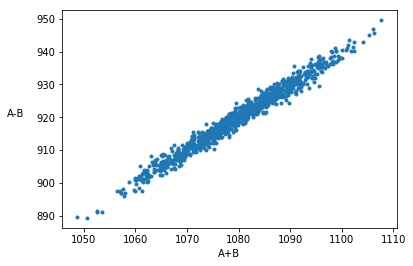

In [250]:
plt.plot(a_mc + b_mc, a_mc - b_mc, '.')
plt.xlabel('A+B')
plt.ylabel('A-B', rotation=0, labelpad=20)

(1000, 1) (1000, 1)


(40, 120)

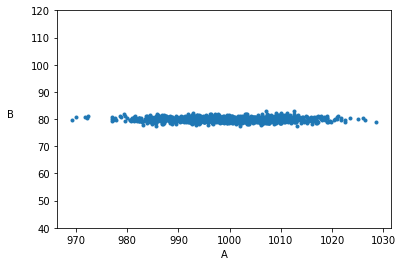

In [251]:
print(a_mc.shape, b_mc.shape)
plt.plot(a_mc, b_mc, '.')
plt.xlabel('A')
plt.ylabel('B', rotation=0, labelpad=20)
plt.ylim([40, 120])

The scatterhist plot function in the Statistics and Machine Learning Toolbox makes the point of this section even more clearly.

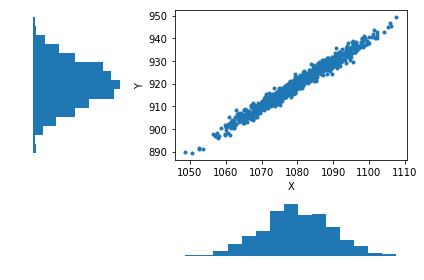

In [266]:


scatter_axes = plt.subplot2grid((3, 3), (0, 1), rowspan=2, colspan=2)
plt.xlabel('X')
plt.ylabel('Y')


x_hist_axes = plt.subplot2grid((3, 3), (2, 1), colspan=2,
                               sharex=scatter_axes)
plt.axis('off')

y_hist_axes = plt.subplot2grid((3, 3), (0, 0), rowspan=2,
                               sharey=scatter_axes)
plt.axis('off')

scatter_axes.plot(a_mc + b_mc, a_mc - b_mc, '.')
plt.axis('off')
x_hist_axes.hist(a_mc + b_mc, bins=15)

y_hist_axes.hist(a_mc - b_mc, orientation='horizontal', bins=15)


# adjust spacing between subplots to minimize the overlaps
plt.tight_layout()

The scatterplots show that large values of $A - B$ are correlated with large values of $A + B$; this makes the fluctuations in the ratio $Z= (A - B)/(A + B)$ ''smaller'' than what they would be if the numerator and denominator were uncorrelated. We can confirm this with another simulation: let $Z^\prime = X/Y$, where $\bar{X} = \bar{A} - \bar{B}$, $\alpha_X=\alpha_{A - B}$, $\bar{Y} = \bar{A} + \bar{B}$ , $\alpha_Y = \alpha_{A + B}$, but $X$ and $Y$ are ''uncorrelated''.

In [273]:
x_bar = a_bar - b_bar
y_bar = a_bar + b_bar
alpha_x = np.sqrt(alpha_a**2 + alpha_b**2)
alpha_y = np.sqrt(alpha_a**2 + alpha_b**2)
alpha_z_prime = z_bar * np.sqrt((alpha_x/x_bar)**2 + (alpha_y/y_bar)**2)

x_mc = x_bar + alpha_x * np.random.randn(n_mc, 1)
y_mc = y_bar + alpha_y * np.random.randn(n_mc, 1)
z_prime_mc = x_mc / y_mc

std_z_prime = np.std(z_prime_mc, ddof=1)

print('std_z_prime = {:.5f}, \t alpha_z_prime = {:.5}'.format(std_z_prime, alpha_z_prime))

std_z_prime = 0.01205, 	 alpha_z_prime = 0.012202


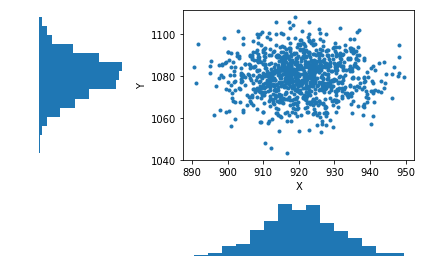

In [274]:
scatter_axes = plt.subplot2grid((3, 3), (0, 1), rowspan=2, colspan=2)
plt.xlabel('X')
plt.ylabel('Y')


x_hist_axes = plt.subplot2grid((3, 3), (2, 1), colspan=2,
                               sharex=scatter_axes)
plt.axis('off')

y_hist_axes = plt.subplot2grid((3, 3), (0, 0), rowspan=2,
                               sharey=scatter_axes)
plt.axis('off')

scatter_axes.plot(x_mc, y_mc, '.')
plt.axis('off')
x_hist_axes.hist(x_mc, bins=15)

y_hist_axes.hist(y_mc, orientation='horizontal', bins=15)


# adjust spacing between subplots to minimize the overlaps
plt.tight_layout()

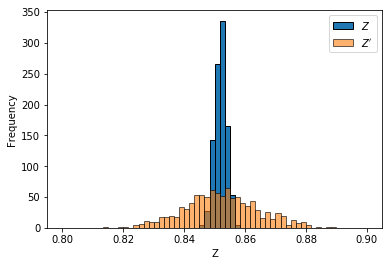

In [285]:
plt.hist(z_mc,range=(0.8, 0.9), bins=60, ec='black', alpha = 1)
plt.hist(z_prime_mc,range=(0.8, 0.9), bins=60, ec='black', alpha = 0.6)
plt.xlabel('Z')
plt.ylabel('Frequency')
plt.legend(['$Z$','$Z^\prime$'])

## 4.3 Propagating errors in functions---a summary
## 4.4 Experimental strategy based on error analysis
## 4.4.1 Experimental strategy for reducing the dominant error
## 4.5 Combined experiments---the weighted mean
Simulate the result of combining two consistent measurements to improve a result. In the first experiment, Alice performs five measurements of the acceleration of gravity with a pendulum, and reports the mean and standard error of her results.

In [308]:
g = 9.8     # m/s^2
alpha_g = 0.01

n1 = 5



g_m_1 = g + alpha_g * np.random.randn(n1, 1)

g_bar_1 = np.mean(g_m_1)
g_err_1 = np.std(g_m_1,ddof=1) / np.sqrt(n1)

print('{:s} measures: ({:.3f} +/- {:.3f}) m/s^2\n'.format('Alice', g_bar_1, g_err_1))




Alice measures: (9.795 +/- 0.005) m/s^2



Now Bob does another five measurements. He also reports the mean and standard error of his results.

In [309]:
n2 = 5

g_m_2 = g + alpha_g * np.random.randn(n2, 1)

g_bar_2 = np.mean(g_m_2)
g_err_2 = np.std(g_m_2,ddof=1) / np.sqrt(n2)

print('{:s} measures: ({:.3f} +/- {:.3f}) m/s^2\n'.format('Bob', g_bar_2, g_err_2))

Bob measures: (9.798 +/- 0.004) m/s^2



The standard errors are different, so to combine them we must take the weighted mean using (4.30), and use (4.32) to compute the combined standard error.

In [310]:
w_1 = 1 / g_err_1**2
w_2 = 1 / g_err_2**2

g_ce = (w_1*g_bar_1 +  w_2*g_bar_2) / (w_1 + w_2)
g_err_ce = np.sqrt(1/(w_1 + w_2))

print('The combined measurement is: ({:.3f} +/- {:.3f}) m/s^2\n'.format(g_ce, g_err_ce))

The combined measurement is: (9.797 +/- 0.003) m/s^2



Of course we could also just take the mean and standard error of ''all'' of their measurements, since we have the raw data---the weighted mean is really only necessary if we must rely on the reported means and standard errors. The results of the two methods may be slightly different, but they should be close if the original measurements are limited only by statistical uncertainty.

In [337]:

# this cell can be removed
# using numpy features to do the above simulation
n = 5
# generage the data point for Alice and Bob in a 5x2 array

g_m = g + alpha_g * np.random.randn(n, 2)
print('Alice data,  Bob data\n',g_m)

# calculate the mean values for each person

g_bar = np.mean(g_m, axis=0)


# calculate the error for each person
g_err = np.std(g_m, ddof=1, axis=0) / np.sqrt(n)

names = ['Alice', 'Bob']
for ind in range(len(names)):
    print('{:s} measures: ({:.3f} +/- {:.3f}) m/s^2\n'.format(names[ind], g_bar[ind], g_err[ind]))

Alice data,  Bob data
 [[9.78739966 9.81639045]
 [9.80631734 9.80631728]
 [9.8018173  9.81182674]
 [9.8036643  9.78749767]
 [9.80049064 9.81041115]]
Alice measures: (9.800 +/- 0.003) m/s^2

Bob measures: (9.806 +/- 0.005) m/s^2



In [338]:
g_all = np.mean(np.array([g_m_1, g_m_2]))
g_err_all = np.std(np.array([g_m_1, g_m_2]), ddof=1) / np.sqrt(n1 + n2)

print('Combining the raw data gives: ({:.3f} +/- {:.3f}) m/s^2\n'.format(g_all, g_err_all))

Combining the raw data gives: (9.797 +/- 0.003) m/s^2



## 4.5.1 The error in the mean---a special case of the weighted mean

### Exercises
#### 1 - Exercise (4.1)
#### 2 - Exercise (4.4)
#### 3 - Exercise (4.7)